## Control 1 - P1. Regresión

contestado por Diego Avendaño

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Importar y explorar datos

1.- Importe los datos e identifique la respuesta de interés 

In [95]:
data = pd.read_csv("LifeExpectancy.csv") #Importamos los datos del Dataset
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Como podemos identificar, la respuesta de interés es Life expectancy, ya que nos indica la expectativa de vida, que es lo que queremos predecir.

2.- Muestre los estadísticos de los datos numéricos (.describe())

In [96]:
data.describe() #Describimos los datos numéricos a través de sus estadísticos

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


3.- Muestre los tipos de los datos y borre las columnas no numéricas y los valores nulos

In [97]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [98]:
#Eliminamos las columnas no numéricas y estandaricemos los nombres de las columnas
data = data.drop(columns=["Country", "Status"])
data.columns=["year", "life_expectancy", "adult_mortality", "infant_deaths", "alcohol", "percentage_expenditure", "hepatitis_b", "measles", "bmi", "under-five_deaths", "polio", "total_expenditure", "diphtheria", "hiv_aids", "gdp", "population", "thinness_1-19_years", "thinness_5-9_years", "income_composition_of_resources", "schooling"]
data

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2015,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2004,44.3,723,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,2003,44.5,715,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,2002,44.8,73,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,2001,45.3,686,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [99]:
#Vemos si tenemos valores nulos
def count_nulls(data):
    for column in data.columns: #Iteramos las columnas
        print(column, len(data[data[column].isna()])) #Vemos la cantidad de nulos
count_nulls(data)

year 0
life_expectancy 0
adult_mortality 0
infant_deaths 0
alcohol 193
percentage_expenditure 0
hepatitis_b 553
measles 0
bmi 32
under-five_deaths 0
polio 19
total_expenditure 226
diphtheria 19
hiv_aids 0
gdp 443
population 644
thinness_1-19_years 32
thinness_5-9_years 32
income_composition_of_resources 160
schooling 160


Podemos notar que hay nulos en alcohol, hepatitis_b, bmi, total_expenditure, disphtheria, gdp, population, thinness_1-19_years, thinness_5-9_years, income_composition_of_resources y en schooling.

In [100]:
# Borramos los valores nulos
data = data.dropna() 
count_nulls(data) #Nos quedamos sin nulos

year 0
life_expectancy 0
adult_mortality 0
infant_deaths 0
alcohol 0
percentage_expenditure 0
hepatitis_b 0
measles 0
bmi 0
under-five_deaths 0
polio 0
total_expenditure 0
diphtheria 0
hiv_aids 0
gdp 0
population 0
thinness_1-19_years 0
thinness_5-9_years 0
income_composition_of_resources 0
schooling 0


4.- Cree un heatmap de correlación entre los datos numéricos

<Axes: >

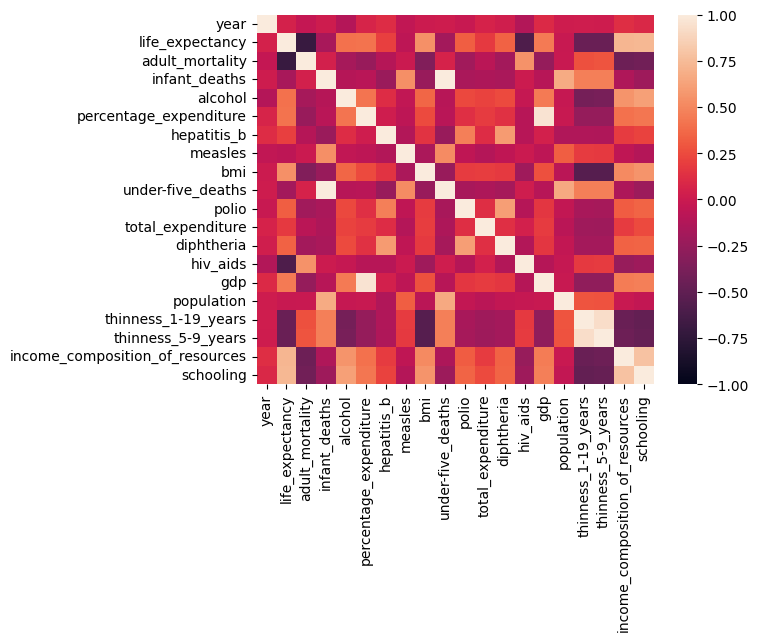

In [101]:
sns.heatmap(data.corr(), vmin=-1, vmax=1) #Vemos la correlación de todas las features

## Entrenamiento

1.- Asigne las variables X e y como las features y respuesta respectívamente. Separe sus datos en train
y test

In [102]:
y = data.life_expectancy #Dejemos en la variable X las features
X = data.drop(columns="life_expectancy") #Y en y a la respuesta (life_expectancy)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #Separamos los datos en conjuntos de training y testing

2.- Use un escalador para entrenar y transformar los datos de X_train, transforme en X_test

In [104]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train) #Primero, estandarizamos los datos
X_test = ss.transform(X_test)

3.- Entrene una regresión lineal con el dataset de entrenamiento. Ajuste utilizando todos los datos de
entrenamiento y luego utilizando cross validation. Muestre el score para ambos casos (R2)

In [105]:
#Entrenamos sin cross validation primero
lr = LinearRegression()
lr.fit(X_train, y_train) #Entrenamos
#Imprimimos R2
print("R2", float(round(lr.score(X_train, y_train), 5)))

R2 0.84173


In [106]:
#Evaluemos la generalización del modelo usando cross validation. 
lr = LinearRegression()
cv_score = cross_validate(lr, X_train, y_train)["test_score"]
print("Mean cv:", float(cv_score.mean().round(3)), "Std cv:", float(cv_score.std().round(3)))

Mean cv: 0.829 Std cv: 0.026


4.- ¿Qué método proporciona un menor R2 (con o sin cross validation)? ¿En cual confiaría mas? Justifique
brevemente

El método que proporciona un menor R2 es el método con cross validation.
Confiaría más en el método sin cross validation, ya que está más cercano a 1, por lo que tiene un mejor ajuste.

5.- Entrene nuevamente con todos los datos de train y realice las predicciones correspondientes al conjunto
de y_test

In [107]:
lr = LinearRegression()
lr.fit(X_train, y_train) #Entrenamos
y_pred = lr.predict(X_test) #Predecimos
y_pred

array([71.83390224, 72.84234659, 80.33436397, 54.38458891, 51.7458578 ,
       50.5230963 , 70.57421203, 76.24558046, 78.30393157, 73.5784553 ,
       75.19891216, 75.48450798, 78.14477561, 68.54241809, 66.29024804,
       70.32235222, 79.55168251, 80.39538971, 75.86360616, 70.92051867,
       79.7919202 , 71.32576979, 70.37392746, 74.62682724, 65.37032146,
       71.20840065, 74.5667431 , 75.90123776, 81.04858141, 72.82033526,
       65.17306942, 60.84072737, 72.5457112 , 80.80245468, 77.02403625,
       78.85590505, 61.13819208, 47.95902155, 72.7759397 , 79.03113706,
       61.22111804, 75.67193295, 72.25857229, 72.56762495, 76.95467817,
       62.18222886, 73.35682139, 58.30531779, 69.27590224, 73.16828646,
       63.26483993, 65.91018434, 57.0421773 , 72.06271904, 74.69505722,
       55.74907784, 76.80029054, 75.22385101, 72.42838001, 61.72999503,
       58.79422454, 59.84452551, 68.23360008, 73.94516369, 71.6246874 ,
       76.74661215, 59.89266688, 76.38639592, 78.88967308, 68.79

6.- ¿En qué se diferencian el modelo de regresión lineal con su contraparte Ridge y Lasso?

Se diferencian en que Ridge y Lasso ocupan la técnica de Regularización, por lo que añaden un término de penalización. De esta manera logra combatir el overfitting, y que así el modelo generalice bien en nuevos datos o datos desconocidos.

7.- ¿Cómo se llama la loss function para el modelo lineal de regresión?

Se llama Least Squares Error.

8.- ¿Cómo se llama el estimador de maximum likelihood para este modelo?

Se llama Pseudo-inversa de Moore-Penrose.

9.- ¿Para qué se utiliza K-fold cross validation? Explique el proceso

Se utiliza para medir la generalización del modelo en datos nuevos. El proceso consiste en que primero se divide el dataset de entrenamiento en K chunks. Luego, K-1 forman el training set, y el último es el validation
set (V). Así, este proceso itera entre las K posibles combinaciones, promediando los desempeños del modelo.

10.- ¿Qué método numérico secuencial se utiliza para minimizar la loss function? Nombre y escriba su fórmula.

Stochastic Gradient Descent (SGD); 
Fórmula: w^(𝜏 + 1) = w^(𝜏) - η * gradient(En)

## Interpretación

1.- Reporte las métricas de MSE, MAE y R² para el conjunto X_test

In [108]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred)) 
print("R2", r2_score(y_test, y_pred))

MSE 13.516706224397188
MAE 2.7898832159349323
R2 0.8193137674343072


2.- Realice un scatterplot comparando el valor real de y_test con el valor predicho y_pred

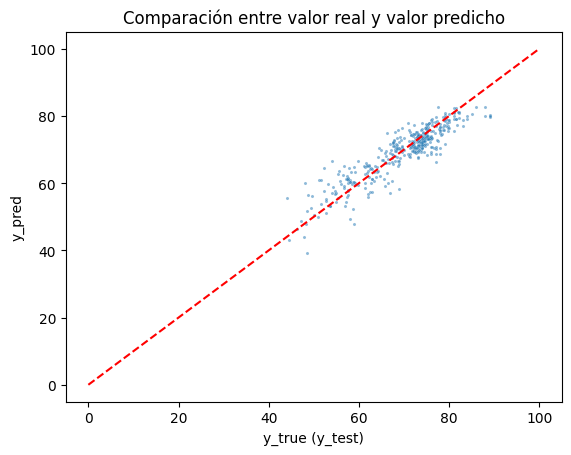

In [109]:
sns.scatterplot(x = y_test, y = y_pred, alpha=0.5, s=5) #Este es el comportamiento del modelo lineal
plt.plot([0,100], [0,100], c = "red", linestyle="--")
plt.title(f"Comparación entre valor real y valor predicho")
plt.xlabel("y_true (y_test)")
plt.ylabel("y_pred")
plt.show()

3.- ¿Qué ventaja tiene utilizar RMSE en lugar de MSE?

La ventaja que otorga utilizar RMSE en vez de MSE, es que RMSE se interpreta en las mismas unidades que la variable objetivo.

4.- Considerando el valor de R² ¿Cuál es el valor del coeficiente de correlación del modelo, r?

El valor del coeficiente de correlación del modelo, r, es la raíz cuadrada de R², ya que como su nombre lo indica, R² es el cuadrado de la correlación lineal.

In [110]:
#En este caso, el valor de r sería el siguiente
print("r:", np.sqrt(r2_score(y_test, y_pred)))


r: 0.9051595259589921
